# Machine Learning II
## Assignment # 1: Feature Engineering 
### Juan Pablo García Gómez
### MBD O - 1
The following docuent presents the feature engineering process applied to the experimental dataset HR Analytics. This dataset contains information about employees of a large company regarding their satisfaction level, time in the company, performance, and salary among others. The main objective is to understand the probability of attrition (employee leaving the company) and recognize which are the most important variables to be addressed to prevent attrition to happen.

Importing libraries, reading data and having a first glimpse in the features and structure:

In [1]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import copy
import warnings
import scipy.stats as ss

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

from collections import defaultdict

from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, validation_curve, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

import matplotlib.pyplot as plt

import seaborn as sns

raw = pd.read_csv('C:\\Users\\Juan Pablo García\\Documents\\MSC Big Data\\Big Data Classes\\Term 2\\Machine Learning II\\Individual Assignment\\turnover.csv', engine='python')

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


First impressions:
* We can see that the dataset don't present missing values. 
* All the variables are numeric except sales and salary.
* Our target variable, which will be defined in the future is left (1 if the worker left the company, 0 if he didn't leave)

The following are brief descriptions of the variables and their distribution statistics:

In [2]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [3]:
raw[['sales', 'salary']].describe().T

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


In the data understanding phase is important to understand the data type and analyze the distribution of the variables.
The following are histograms and box plots for the different variables.

Text(0.5, 1.0, 'Histogram Satisfaction Level')

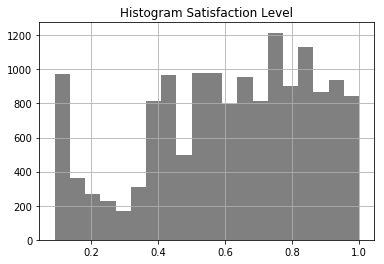

In [4]:
raw.satisfaction_level.hist(facecolor = 'gray', bins = 20)
plt.title('Histogram Satisfaction Level')

Text(0.5, 1.0, 'Satisfaction Level')

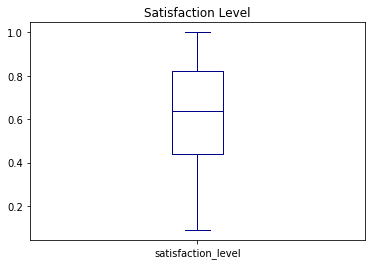

In [5]:
raw.satisfaction_level.plot(kind='box', color='darkblue')
plt.title('Satisfaction Level')

C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


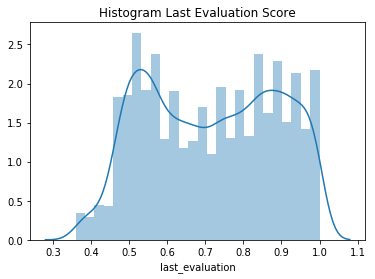

In [6]:
#raw.last_evaluation.hist(bins = 20)
plt.title('Histogram Last Evaluation Score')
sns.distplot(raw.last_evaluation)

Text(0.5, 1.0, 'Last Evaluation Score')

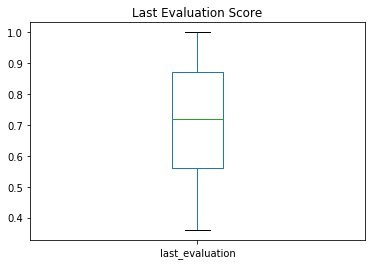

In [7]:
raw.last_evaluation.plot(kind = 'box')
plt.title('Last Evaluation Score')

Text(0.5, 1.0, 'Histogram Number Projects')

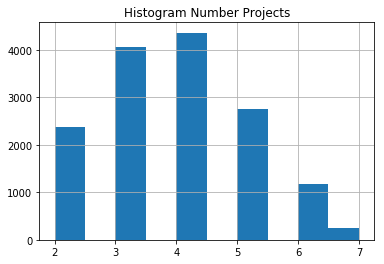

In [8]:
raw.number_project.hist()
plt.title('Histogram Number Projects')

Text(0.5, 1.0, 'Number Projects')

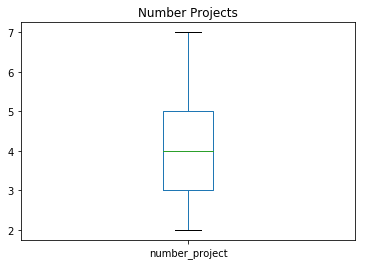

In [9]:
raw.number_project.plot(kind="box")
plt.title('Number Projects')

Text(0.5, 1.0, 'Histogram Average Montly Hours')

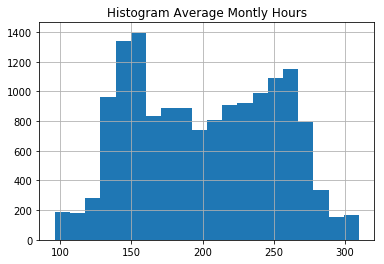

In [10]:
raw.average_montly_hours.hist(bins = 20)
plt.title('Histogram Average Montly Hours')

Text(0.5, 1.0, 'Average Montly Hours')

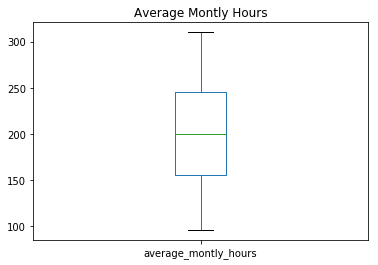

In [11]:
raw.average_montly_hours.plot(kind="box")
plt.title('Average Montly Hours')

Text(0.5, 1.0, 'Histogram Time Spend in Company')

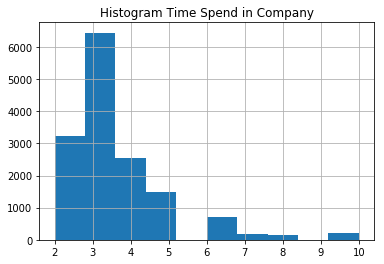

In [12]:
raw.time_spend_company.hist()
plt.title('Histogram Time Spend in Company')


Text(0.5, 1.0, 'Time Spend in Company')

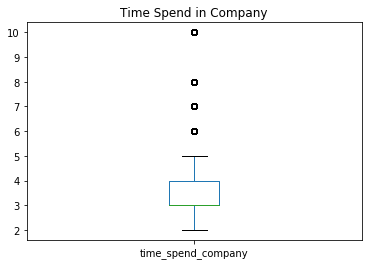

In [13]:
raw.time_spend_company.plot(kind="box")
plt.title('Time Spend in Company')

Text(0.5, 1.0, 'Sales Count')

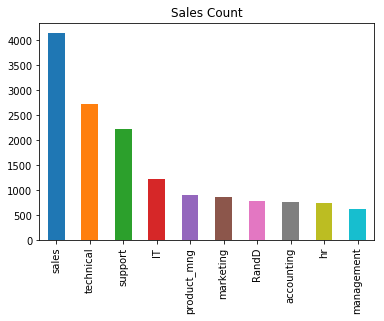

In [14]:
raw.sales.value_counts().plot(kind='bar')
plt.title('Sales Count')

Text(0.5, 1.0, 'Salary')

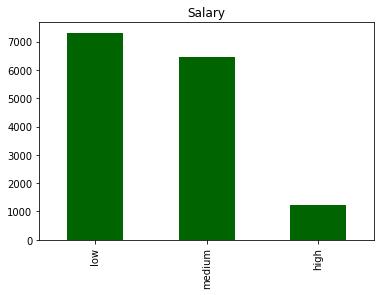

In [15]:
raw.salary.value_counts().plot(kind='bar', color = 'darkgreen')
plt.title('Salary')

In [16]:
print(raw.Work_accident.value_counts()/len(raw.Work_accident))
print(raw.promotion_last_5years.value_counts()/len(raw.promotion_last_5years))
print(raw.left.value_counts()/len(raw.left))

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64
0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64
0    0.761917
1    0.238083
Name: left, dtype: float64


For our target variable, we can see that 24% of the observations are classified as 1 "left the company", while 76% are classified as 0. This shows kind of an unbalanse in the target variable of our dataset.

Text(0.5, 0, 'number_project')

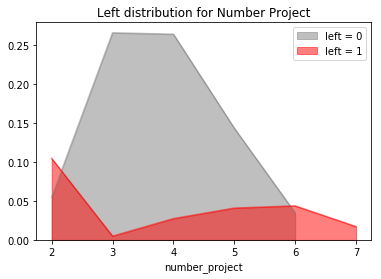

In [17]:
((raw[raw.left==0].number_project.value_counts().sort_index()/len(raw.left)).plot(kind='area',color='gray', alpha = 0.5, label='left = 0'))
((raw[raw.left==1].number_project.value_counts().sort_index()/len(raw.left)).plot(kind='area',color='r',alpha=0.5, label = 'left = 1')).legend()
plt.title('Left distribution for Number Project')
plt.xlabel('number_project')

Text(0.5, 0, 'salary')

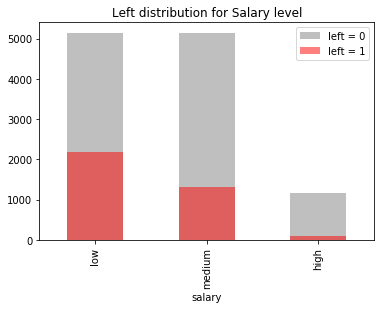

In [18]:
((raw[raw.left==0].salary.value_counts()).plot(kind='bar',color='gray', alpha = 0.5, label='left = 0'))
((raw[raw.left==1].salary.value_counts()).plot(kind='bar',color='r',alpha=0.5, label = 'left = 1')).legend()
plt.title('Left distribution for Salary level')
plt.xlabel('salary')

Text(0.5, 0, 'Time in years')

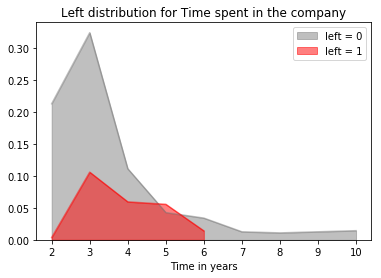

In [19]:
((raw[raw.left==0].time_spend_company.value_counts().sort_index()/len(raw.left)).plot(kind='area',color='gray', alpha = 0.5, label='left = 0'))
((raw[raw.left==1].time_spend_company.value_counts().sort_index()/len(raw.left)).plot(kind='area',color='r',alpha=0.5, label = 'left = 1')).legend()
plt.title('Left distribution for Time spent in the company')
plt.xlabel('Time in years')

## Creating an ordinal variable for salary_num

In [20]:
raw.salary.value_counts()/len(raw.salary)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

We saw that salary is a non-numeric variable. We will proceed to categorize it for an inclusion in the logistic regression analysis:
* low = 0
* medium = 1
* high = 2

In [21]:
raw_num = raw.copy()

replace = {"low": 0, "medium": 1, "high": 2}
raw_num['salary_num'] = raw_num['salary'].map(replace)

raw_num['salary_num'] = raw_num['salary_num'].astype('category')

raw_num.drop('salary', inplace=True, axis=1)

raw_num.head()
#raw_num.salary_num.describe()
raw_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary_num               14999 non-null category
dtypes: category(1), float64(2), int64(6), object(1)
memory usage: 1.0+ MB


To understand if we should drop any feature from the data and also have a first glimpse in which variables are more related to our target variable, it's important to analyze correlations:

Text(0.5, 1.0, 'Correlation Matrix')

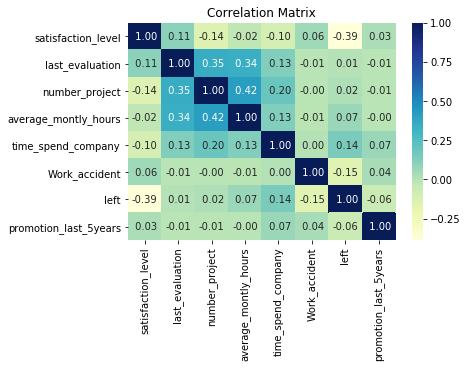

In [22]:
sns.heatmap(raw_num.corr(), cmap="YlGnBu", annot = True, fmt =' .2f')
plt.title('Correlation Matrix')

From the correlation map above, we can see that our target variable "left" is mostly correlated with:
* Satisfaction level (-0.39): The least satisfaction level, the more prone to leave from the company (quite obvious)
* Work Accident (-0.15): If the worker had a working acciden, the possibility of leaving increases.
* Time Spent in Company (0.14): If the worker has spent more time working for the company, the possibility of leaving decreases.

However, in general the correlations aren't so high and it's not necessary to eliminate features only with this information.

Now, to be able to include the sales feature in the Logistic Regression, we will create flag variables for each of the categories:

In [23]:
def numerical_features(df):
    columns = df.columns
    return df._get_numeric_data().columns

def categorical_features(df):
    numerical_columns = numerical_features(df)
    return(list(set(df.columns) - set(numerical_columns)))

def onehot_encode(df):
    numericals = df.get(numerical_features(df))
    new_df = numericals.copy()
    for categorical_column in categorical_features(df):
        new_df = pd.concat([new_df, 
                            pd.get_dummies(df[categorical_column], 
                                           prefix=categorical_column)], 
                           axis=1)
    return new_df

In [24]:
raw_num = onehot_encode(raw)
raw_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales_IT                 14999 non-null uint8
sales_RandD              14999 non-null uint8
sales_accounting         14999 non-null uint8
sales_hr                 14999 non-null uint8
sales_management         14999 non-null uint8
sales_marketing          14999 non-null uint8
sales_product_mng        14999 non-null uint8
sales_sales              14999 non-null uint8
sales_support            14999 non-null uint8
sales_technical          14999 non-null uint8
salary_high              14999 non-null uint8
salary_low   

## Check Under Represented Features

In [25]:
def under_represented_features(df):
    under_rep = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if ((zeros / len(df)) * 100) > 99.0:
            under_rep.append(i)
    df.drop(under_rep, axis=1, inplace=True)
    return df
raw_num_repr = under_represented_features(raw_num)

raw_num_repr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales_IT                 14999 non-null uint8
sales_RandD              14999 non-null uint8
sales_accounting         14999 non-null uint8
sales_hr                 14999 non-null uint8
sales_management         14999 non-null uint8
sales_marketing          14999 non-null uint8
sales_product_mng        14999 non-null uint8
sales_sales              14999 non-null uint8
sales_support            14999 non-null uint8
sales_technical          14999 non-null uint8
salary_high              14999 non-null uint8
salary_low   

We can see that there are no under represented features in the dataset.

## Check Skewness / Normalization

In [26]:
raw_num.describe().T


,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
sales_IT,14999.0,0.081805,0.274077,0.00,0.00,0.00,0.00,1.0
sales_RandD,14999.0,0.052470,0.222981,0.00,0.00,0.00,0.00,1.0


In [27]:
def feature_skewness(df):
    numeric_dtypes = ['int16', 'int32', 'int64', 
                      'float16', 'float32', 'float64']
    target_variable = ['left']
    numeric_features = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes and df[i].name not in target_variable: 
            numeric_features.append(i)

    feature_skew = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':feature_skew})
    return feature_skew, numeric_features


In [28]:
#feature_skewness(raw_num)

In [29]:
def fix_skewness(df):
    feature_skew, numeric_features = feature_skewness(df)
    high_skew = feature_skew[feature_skew > 0.5]
    skew_index = high_skew.index
    
    for i in skew_index:
        df[i] = boxcox1p(df[i], boxcox_normmax(df[i]+1))

    skew_features = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':skew_features})
    return df

In [30]:
#raw_num2 = fix_skewness(raw_num)

Now we will see if analyzing outliers and removing them the accuracy improves.

In [31]:
def remove_outliers(df):
    X = df.drop(['left'], axis=1)
    y = df.left.reset_index(drop=True)
    ols = sm.OLS(endog = y, exog = X)
    fit = ols.fit()
    test = fit.outlier_test()['bonf(p)']
    outliers = list(test[test<1e-3].index) 
    df.drop(df.index[outliers])
    return df

In [32]:
raw_num_std = RobustScaler().fit(raw_num)
raw_num_std.transform(raw_num)

array([[-0.68421053, -0.61290323, -1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.42105263,  0.4516129 ,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [-1.39473684,  0.51612903,  1.5       , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.71052632, -0.61290323, -1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.39473684,  0.77419355,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.71052632, -0.64516129, -1.        , ...,  0.        ,
         1.        ,  0.        ]])

## Baseline Model
Now that all the variables are numerical. I may proceed to run an initial Logistic Regression. This first regression will provide the initial Accuracy Score that I will use as a benchmark for the feature engineering process. The Logit will be carried out with Robust Scaler to normalize the data considering that the features have different scales. The robust scaler helps with outlier detenction and treatment by scaling with the interquartile range.

In [33]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=22)
X = raw_num.loc[:, raw_num.columns != 'left']
y = raw_num.loc[:, 'left']
#X_train_db, X_test_ho, y_train_db, y_test_ho = train_test_split(X, y, test_size=0.20, random_state=666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=333)

benchmark_model = make_pipeline(RobustScaler(), LogisticRegression().fit(X_train,y_train))
scores = cross_val_score(benchmark_model, X, y, cv=kfolds, scoring='accuracy')
scores

print('Obtained {} positive Accuracy scores'.format(len(scores[scores > 0.0])))
print('Best Validation Accuracy: {:.2f}'.format(max(scores)))
print('Avg. Validation Accuracy: {:.2f}'.format(np.mean(scores[scores > 0.0])))

C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Obtained 5 positive Accuracy scores
Best Validation Accuracy: 0.80
Avg. Validation Accuracy: 0.79


C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
scores

array([0.79533333, 0.786     , 0.80133333, 0.79166667, 0.78059353])

C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


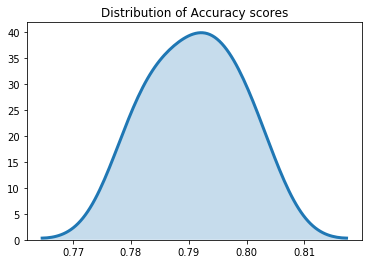

In [35]:
sns.distplot(scores, hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3});
plt.title('Distribution of Accuracy scores')
plt.show();

In [36]:
def cv_evaluate(df, splits=100):
    regr = linear_model.LogisticRegression()
    kfolds = KFold(n_splits=10, shuffle=True, random_state=23)

    X = df.drop(['left'], axis=1)
    y = df.left.reset_index(drop=True)
    benchmark_model = make_pipeline(RobustScaler(), regr().fit(X=X, y=y))
    scores = cross_val_score(benchmark_model, X, y, scoring='accuracy', cv=kfolds)
    return scores[scores >= 0.0]

def score_model(data, seed=666):
    X = data.loc[:, data.columns != 'left']
    y = data.loc[:, 'left']
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.20, 
                                                        random_state=seed)
    # Create logistic regression object
    regr = linear_model.LogisticRegression(C=0.5)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    #return confusion_matrix(y_test, y_pred)
    return accuracy_score(y_test, y_pred)

The initial average Accuracy score from the cross validation with the initial numeric raw data is **0.79**.
Now we will perform feature engineering to analize if this metric improves or not.

## Feature Engineering

### Bin Creation

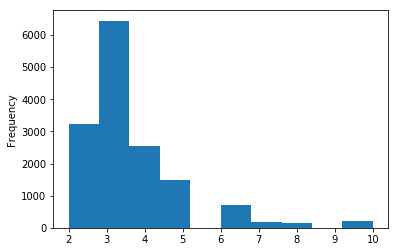

In [37]:
raw_num.time_spend_company.plot.hist()

Bin creation for satisfaction level and last evaluation, considering the skewness.

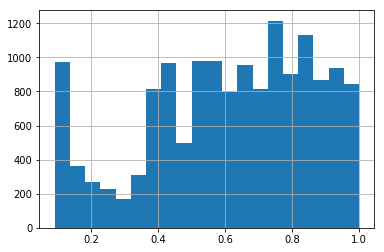

In [38]:
raw_num_bins = raw_num.copy()
raw_num_bins.satisfaction_level.hist(bins=20)

In [39]:
#last_evaluation
raw_num_bins['last_evaluation_bin'] = pd.cut(raw_num_bins.last_evaluation ,6)
raw_num_bins = pd.concat([raw_num_bins, pd.get_dummies(raw_num_bins['last_evaluation_bin'],prefix='last_eval', prefix_sep='_')], axis=1)
raw_num_bins.drop('last_evaluation_bin', inplace=True, axis=1)
raw_num_bins.drop('last_evaluation', inplace=True, axis=1)

#satisfaction_level
raw_num_bins['satisfaction_level_bin'] = pd.cut(raw_num_bins.satisfaction_level ,6)
raw_num_bins = pd.concat([raw_num_bins, pd.get_dummies(raw_num_bins['satisfaction_level_bin'],prefix='satisf_lev', prefix_sep='_')], axis=1)
raw_num_bins.drop('satisfaction_level_bin', inplace=True, axis=1)
raw_num_bins.drop('satisfaction_level', inplace=True, axis=1)

#average_monthly_hours
raw_num_bins['average_montly_hours_bin'] = pd.cut(raw_num_bins.average_montly_hours ,6)
raw_num_bins = pd.concat([raw_num_bins, pd.get_dummies(raw_num_bins['average_montly_hours_bin'],prefix='avg_mh', prefix_sep='_')], axis=1)
raw_num_bins.drop('average_montly_hours_bin', inplace=True, axis=1)
raw_num_bins.drop('average_montly_hours', inplace=True, axis=1)

#number_project
cats = { 1: "very_low", 2: "very_low", 3 : "low", 4 : "low", 5 : "medium", 6: "medium", 7: "high", 8: "high", 9:"very_high",10: "very_high"}
raw_num_bins['number_project_cat'] = raw_num_bins['number_project'].map(cats)
raw_num_bins.drop('number_project', inplace=True, axis=1)
raw_num_bins = pd.concat([raw_num_bins, pd.get_dummies(raw_num_bins['number_project_cat'],prefix='num_proj', prefix_sep='_')], axis=1)
raw_num_bins.drop('number_project_cat', inplace=True, axis=1)

#time_spend_company
cats = { 2: "very_low", 3: "low", 4: "low", 5 : "medium", 6: "medium", 7: "high", 8: "high", 9:"high",10: "high"}
raw_num_bins['time_spend_company_cat'] = raw_num_bins['time_spend_company'].map(cats)
raw_num_bins.drop('time_spend_company', inplace=True, axis=1)
raw_num_bins = pd.concat([raw_num_bins, pd.get_dummies(raw_num_bins['time_spend_company_cat'],prefix='t_spend_c', prefix_sep='_')], axis=1)
raw_num_bins.drop('time_spend_company_cat', inplace=True, axis=1)

In [40]:
raw_num_bins.describe().T

,count,mean,std,min,25%,50%,75%,max
Work_accident,14999.0,0.144610,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
sales_IT,14999.0,0.081805,0.274077,0.0,0.0,0.0,0.0,1.0
sales_RandD,14999.0,0.052470,0.222981,0.0,0.0,0.0,0.0,1.0
sales_accounting,14999.0,0.051137,0.220284,0.0,0.0,0.0,0.0,1.0
sales_hr,14999.0,0.049270,0.216438,0.0,0.0,0.0,0.0,1.0
sales_management,14999.0,0.042003,0.200602,0.0,0.0,0.0,0.0,1.0
sales_marketing,14999.0,0.057204,0.232239,0.0,0.0,0.0,0.0,1.0
sales_product_mng,14999.0,0.060137,0.237749,0.0,0.0,0.0,0.0,1.0


In [41]:
raw_num_bins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 42 columns):
Work_accident                 14999 non-null int64
left                          14999 non-null int64
promotion_last_5years         14999 non-null int64
sales_IT                      14999 non-null uint8
sales_RandD                   14999 non-null uint8
sales_accounting              14999 non-null uint8
sales_hr                      14999 non-null uint8
sales_management              14999 non-null uint8
sales_marketing               14999 non-null uint8
sales_product_mng             14999 non-null uint8
sales_sales                   14999 non-null uint8
sales_support                 14999 non-null uint8
sales_technical               14999 non-null uint8
salary_high                   14999 non-null uint8
salary_low                    14999 non-null uint8
salary_medium                 14999 non-null uint8
last_eval_(0.359, 0.467]      14999 non-null uint8
last_eval_(0.467, 0.573]

### First iteration - Binning evaluation
Now that we created the One Hot encoding for the variables, we will understand if we are adding accuracy with this step. We will run the model with the same characteristics as the Baseline model for comparison.

In [42]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=22)
X = raw_num_bins.loc[:, raw_num_bins.columns != 'left']
y = raw_num_bins.loc[:, 'left']
#X_train_db, X_test_ho, y_train_db, y_test_ho = train_test_split(X, y, test_size=0.20, random_state=666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=333)

benchmark_model = make_pipeline(RobustScaler(), LogisticRegression().fit(X_train,y_train))
scores = cross_val_score(benchmark_model, X, y, cv=kfolds, scoring='accuracy')
#scores

print('Obtained {} positive Accuracy scores'.format(len(scores[scores > 0.0])))
print('Best Validation Accuracy: {:.2f}'.format(max(scores)))
print('Avg. Validation Accuracy: {:.2f}'.format(np.mean(scores[scores > 0.0])))

C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

Obtained 5 positive Accuracy scores
Best Validation Accuracy: 0.93
Avg. Validation Accuracy: 0.92


C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


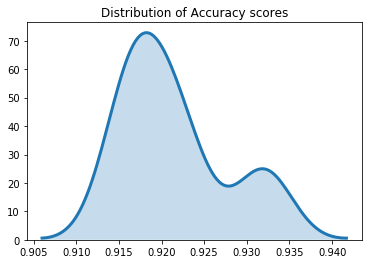

In [43]:
sns.distplot(scores, hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3});
plt.title('Distribution of Accuracy scores')
plt.show();

The accuracy score improved to 92% so this feature engineering step will be considered for further steps.

## PCA
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering.

We will use PCA to see if we can filter the noisy data and simplify the model by reducing the number of features.

The following graph shows the cumulative explained variance by the number of components. This graph allows us to understand how many components use in the model. In this case we can see that 30 components explain more than 90% of the variance.

Original Shape:(14999, 41)


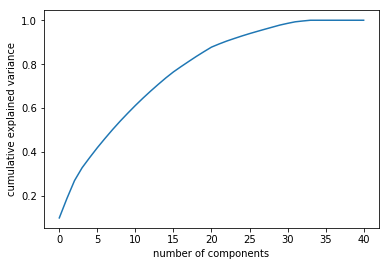

In [44]:
from sklearn.decomposition import PCA
#Choosing the optimal number of components
print("Original Shape:" + str(X.shape))
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)

pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (14999, 41)
transformed shape: (14999, 30)


In [46]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=22)
#X = raw_num_bins.loc[:, raw_num_bins.columns != 'left']
#y = raw_num_bins.loc[:, 'left']
#X_train_db, X_test_ho, y_train_db, y_test_ho = train_test_split(X, y, test_size=0.20, random_state=666)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=333)

benchmark_model = make_pipeline(RobustScaler(), LogisticRegression().fit(X_train,y_train))
scores = cross_val_score(benchmark_model, X_pca, y, cv=kfolds, scoring='accuracy')

print('Obtained {} positive Accuracy scores'.format(len(scores[scores > 0.0])))
print('Best Validation Accuracy: {:.2f}'.format(max(scores)))
print('Avg. Validation Accuracy: {:.2f}'.format(np.mean(scores[scores > 0.0])))

C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

Obtained 5 positive Accuracy scores
Best Validation Accuracy: 0.93
Avg. Validation Accuracy: 0.92


The PCA analysis didn't improve the accuracy score. This feature engineering process will not be considered as reducing the number of features by component creation doesn't improve accuracy levels.

### Polynomial Features
In this step, the idea is to analyze if the features may have a non-linear relationship of second degree. If the relationship is non-linear, the model will have a better fit. However, it is important to further analyze in the cross validation and the hold out dataset, that under this step we aren’t incurring in overfitting of the training dataset.

In [47]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=22)
X = raw_num_bins.loc[:, raw_num_bins.columns != 'left']
y = raw_num_bins.loc[:, 'left']
#X_train_db, X_test_ho, y_train_db, y_test_ho = train_test_split(X, y, test_size=0.20, random_state=666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=333)


benchmark_model = make_pipeline(RobustScaler(), 
                                PolynomialFeatures(degree=2, include_bias=False),
                                LogisticRegression().fit(X_train,y_train))
scores = cross_val_score(benchmark_model, X, y, cv=kfolds, scoring='accuracy')

benchmark_model_holdout = make_pipeline(RobustScaler(), 
                                PolynomialFeatures(degree=2, include_bias=False),
                                LogisticRegression().fit(X_test,y_test))
score_holdout = cross_val_score(benchmark_model_holdout, X_test, y_test, cv=kfolds, scoring='accuracy')

print('Obtained {} positive Accuracy scores'.format(len(scores[scores > 0.0])))
print('Best Validation Accuracy: {:.2f}'.format(max(scores)))
print('Avg. Validation Accuracy: {:.2f}'.format(np.mean(scores[scores > 0.0])))
print('Avg. Accuracy in hold-out dataset: {:.2f}'.format(np.mean(score_holdout)))

C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

Obtained 5 positive Accuracy scores
Best Validation Accuracy: 0.97
Avg. Validation Accuracy: 0.97
Avg. Accuracy in hold-out dataset: 0.96


C:\Users\Juan Pablo García\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


When we include second degree Polynomial Features in the pipeline, we can see that the Accuracy improves to 97%. The hold out dataset presents a similar score showing that we aren’t presenting overfitting. Considering this improvement, this step will be considered in the model.

### Random Forest
As a final step, to understand the feature importance so that the HR representatives have an execution plan by understanding what variables to assess first, a Random Forest algorithm is taken into consideration. With this method, we can measure the relative importance of each feature in the prediction of the model.

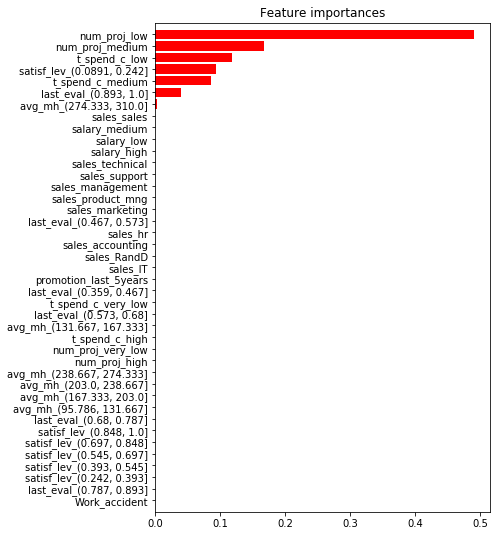

In [48]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X = raw_num_bins.loc[:, raw_num_bins.columns != 'left']
y = raw_num_bins.loc[:, 'left']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=333)

classifier = DecisionTreeClassifier(random_state=333, max_depth=3)
classifier.fit(Xtrain, ytrain)
feature_importance = classifier.feature_importances_
indices = np.argsort(feature_importance)

plt.figure(figsize=(6,9))
plt.title("Feature importances")
plt.barh(range(Xtrain.shape[1]),feature_importance[indices], color="r", align="center")

index_names = [list(Xtrain)[i] for i in indices]

plt.yticks(range(Xtrain.shape[1]), index_names)
plt.ylim([-1, Xtrain.shape[1]])

plt.show()

from sklearn import metrics
#print(metrics.classification_report(ypred, ytest))

As we can see, the most important variables to consider are:
* Number of projects
* Time spend in the company
* Satisfaction Level

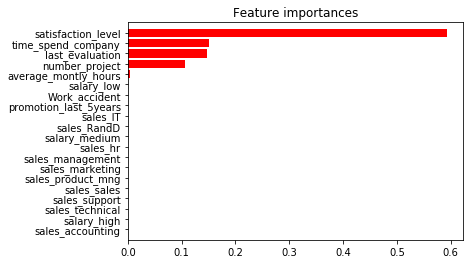

In [49]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X = raw_num.loc[:, raw_num.columns != 'left']
y = raw_num.loc[:, 'left']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=333)

classifier = DecisionTreeClassifier(random_state=333, max_depth=3)
classifier.fit(Xtrain, ytrain)
feature_importance = classifier.feature_importances_
indices = np.argsort(feature_importance)

plt.figure()
plt.title("Feature importances")
plt.barh(range(Xtrain.shape[1]),feature_importance[indices], color="r", align="center")

index_names = [list(Xtrain)[i] for i in indices]

plt.yticks(range(Xtrain.shape[1]), index_names)
plt.ylim([-1, Xtrain.shape[1]])
plt.show()

from sklearn import metrics
#print(metrics.classification_report(ypred, ytest))